In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
df_test   = pd.read_csv('test_lAUu6dG.csv')
df_train  = pd.read_csv('train_ctrUa4K.csv')
df_sample = pd.read_csv('sample_submission_49d68Cx.csv')

train_org = df_train.copy()
test_org = df_test.copy()

In [17]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [19]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [21]:
df_test.shape

(367, 12)

In [22]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [23]:
df_train['Loan_Status'].value_counts(normalize = 'True')

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

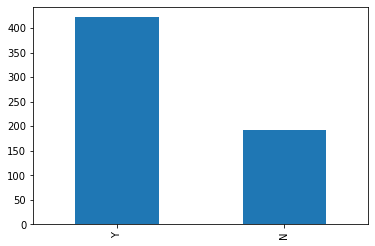

In [24]:
df_train['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Self_Employed'}>

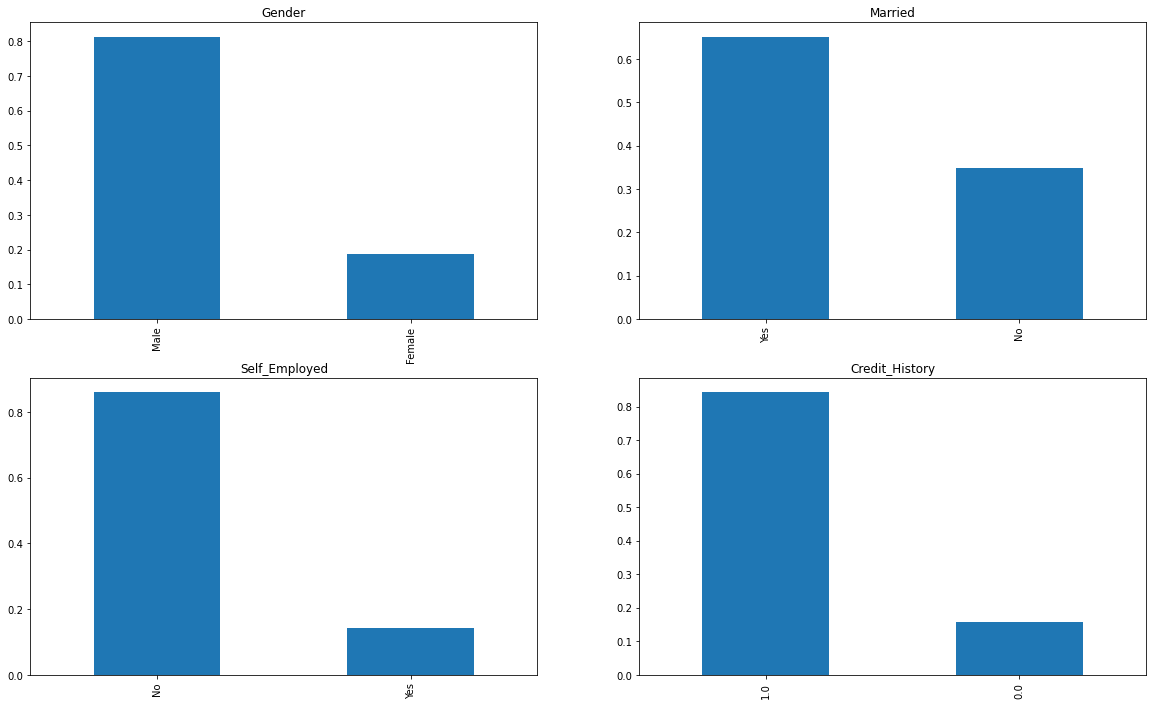

In [25]:
plt.figure(1)

plt.subplot(221)
df_train['Gender'].value_counts(normalize="True").plot.bar(figsize=(20,12), title='Gender')

plt.subplot(222)
df_train['Married'].value_counts(normalize="True").plot.bar(figsize=(20,12), title='Married')

plt.subplot(224)
df_train['Credit_History'].value_counts(normalize="True").plot.bar(figsize=(20,12), title='Credit_History')

plt.subplot(223)
df_train['Self_Employed'].value_counts(normalize="True").plot.bar(figsize=(20,12), title='Self_Employed')

<AxesSubplot:title={'center':'Property_Area'}>

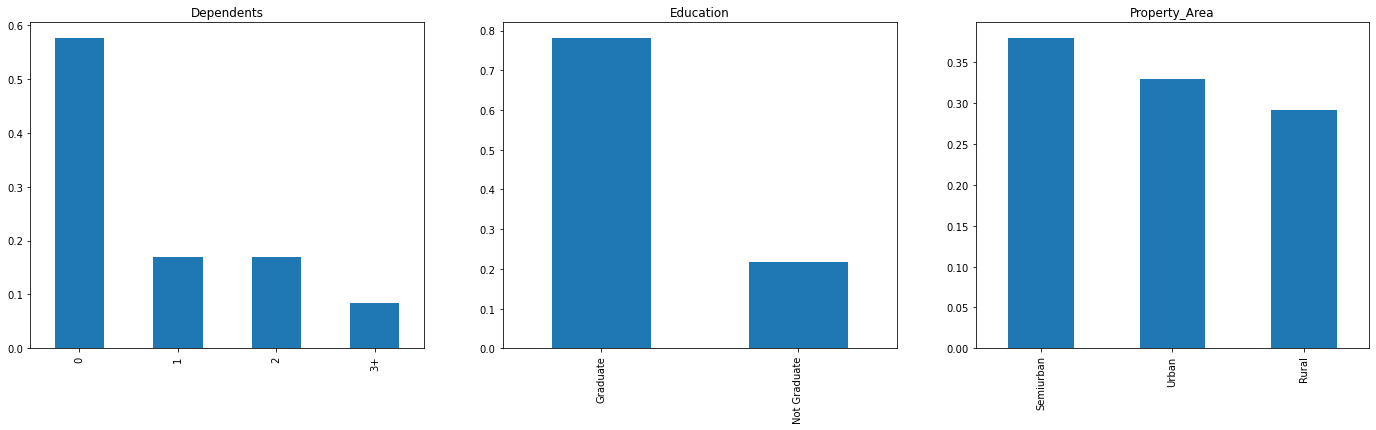

In [26]:
#for ordinal variables

plt.figure(1)

plt.subplot(131)
df_train['Dependents'].value_counts(normalize='True').plot.bar(figsize = (24,6),title ='Dependents')

plt.subplot(132)
df_train['Education'].value_counts(normalize='True').plot.bar(figsize = (24,6),title ='Education')

plt.subplot(133)
df_train['Property_Area'].value_counts(normalize='True').plot.bar(figsize = (24,6),title ='Property_Area')


<AxesSubplot:>

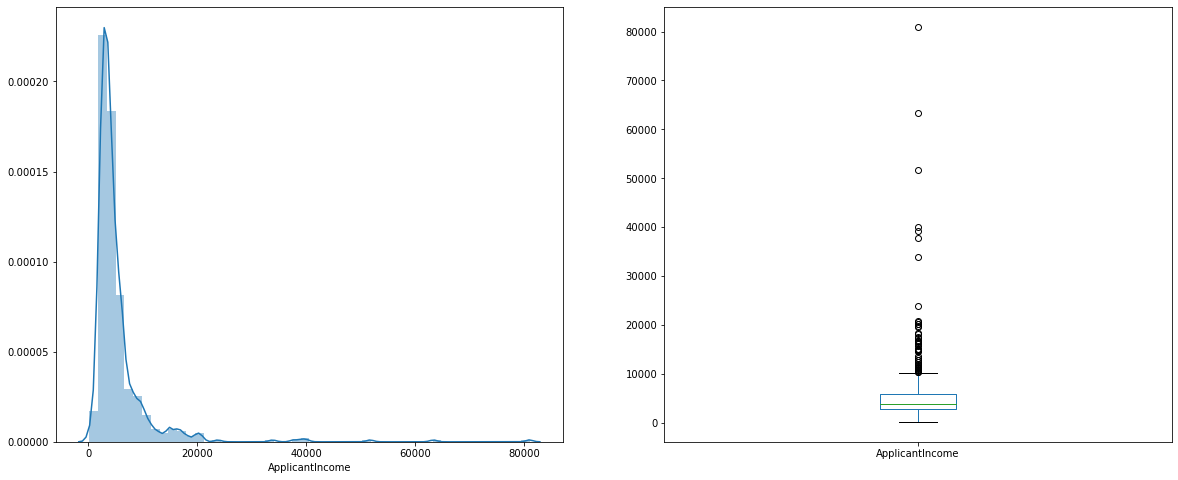

In [27]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df_train['ApplicantIncome'])

plt.subplot(122)
df_train['ApplicantIncome'].plot.box(figsize=(20,8))


Text(0.5, 0.98, '')

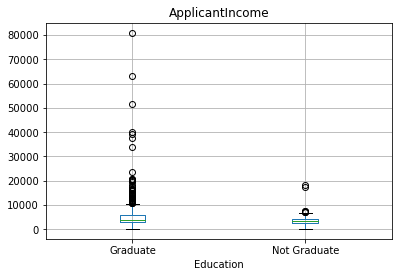

In [28]:
df_train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

<AxesSubplot:>

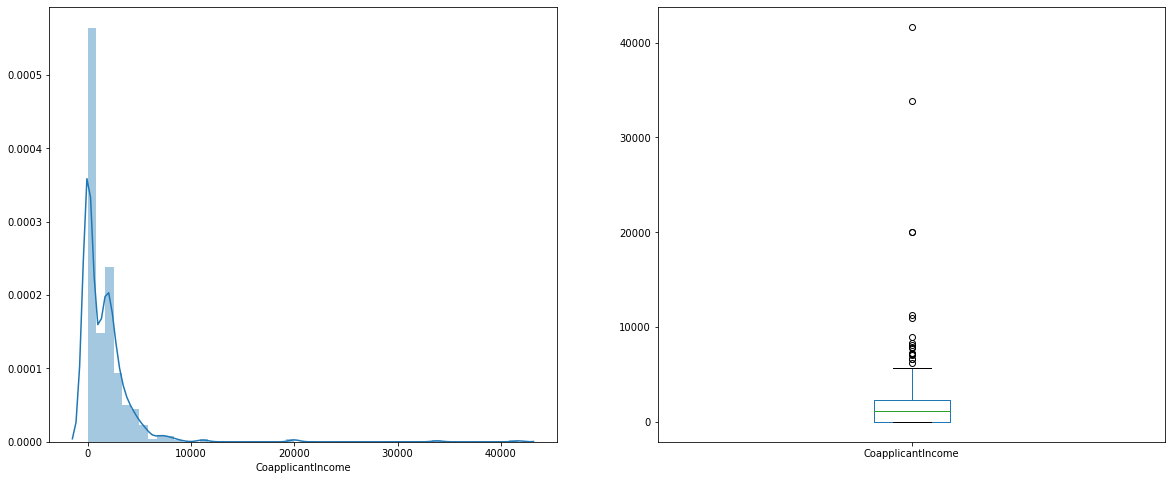

In [29]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df_train['CoapplicantIncome'])

plt.subplot(122)
df_train['CoapplicantIncome'].plot.box(figsize=(20,8))


In [30]:
df_train.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

<AxesSubplot:>

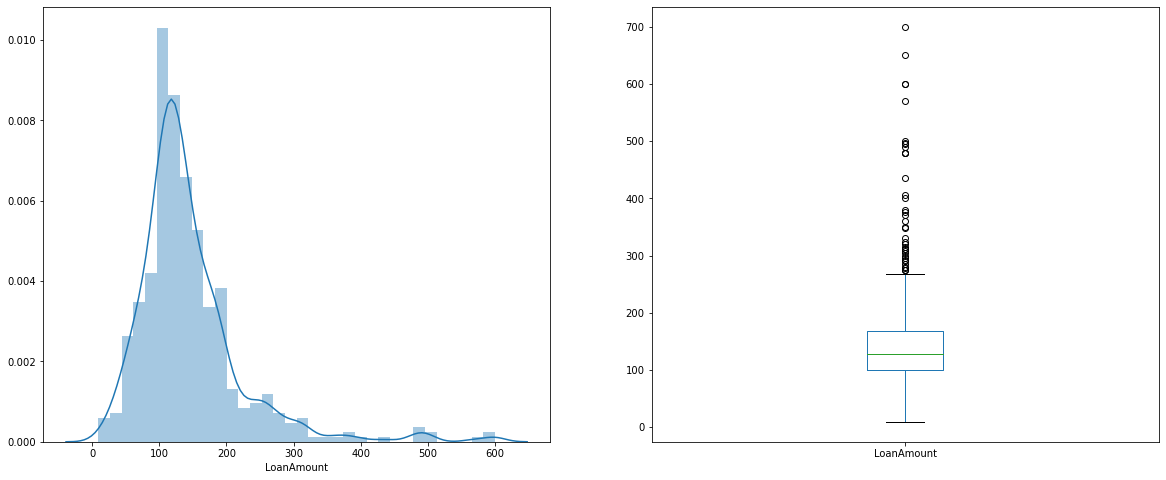

In [31]:
plt.figure(1)

plt.subplot(121)
df = df_train.dropna()
df.count()
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df_train['LoanAmount'].plot.box(figsize=(20,8))


In [32]:
#BIVARIATE ANALYSIS
Gender = pd.crosstab(df_train['Gender'],df_train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [33]:
df = Gender.div(Gender.sum(1).astype(float), axis=0)


In [34]:
df

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


<AxesSubplot:xlabel='Gender'>

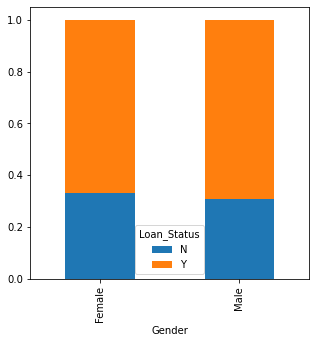

In [35]:
df.plot(kind ='bar', stacked=1,figsize = (5,5))

<AxesSubplot:xlabel='Self_Employed'>

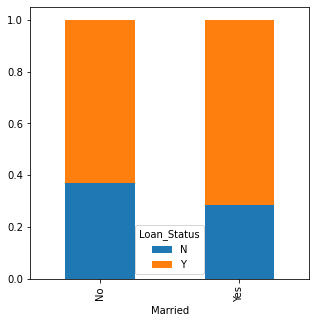

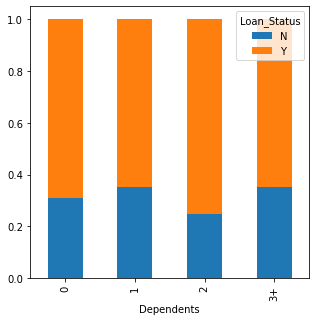

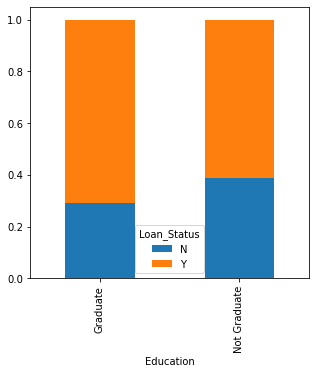

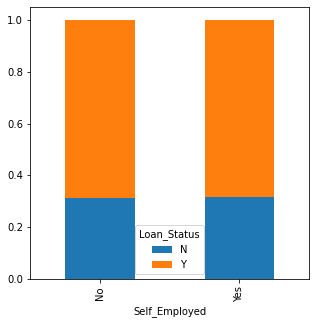

In [36]:


Married = pd.crosstab(df_train['Married'],df_train['Loan_Status'])
Dependent = pd.crosstab(df_train['Dependents'],df_train['Loan_Status'])
Education = pd.crosstab(df_train['Education'],df_train['Loan_Status'])
Self_Employed = pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind ='bar', stacked=1,figsize = (5,5))

Dependent.div(Dependent.sum(1).astype(float), axis=0).plot(kind ='bar', stacked=1,figsize = (5,5))

Education.div(Education.sum(1).astype(float), axis=0).plot(kind ='bar', stacked=1,figsize = (5,5))

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind ='bar', stacked=1,figsize = (5,5))


<AxesSubplot:xlabel='Property_Area'>

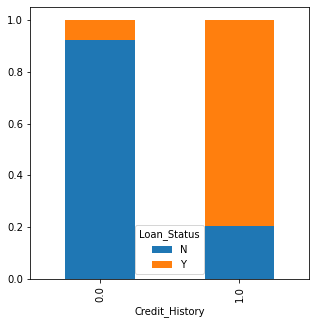

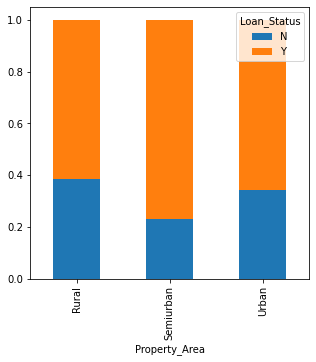

In [37]:
Credit_History = pd.crosstab(df_train['Credit_History'],df_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind ='bar', stacked=1,figsize = (5,5))

Property_Area = pd.crosstab(df_train['Property_Area'],df_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind ='bar', stacked=1,figsize = (5,5))


<AxesSubplot:xlabel='Loan_Status'>

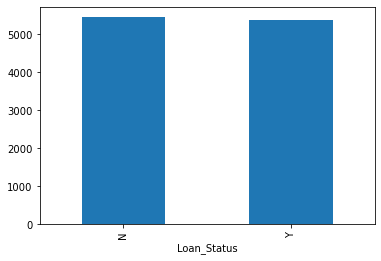

In [38]:
#numerical bivariate
df_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [39]:
#making bins for income of applicants
bins = [0,2500,4000,6500,81000]
groups = ['Low', 'Average', 'High', 'Very High']
df_train['income_bins'] = pd.cut(df_train['ApplicantIncome'], bins, labels=groups)

<AxesSubplot:xlabel='income_bins'>

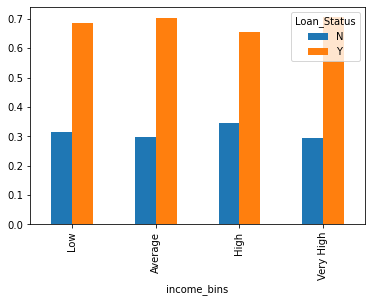

In [40]:
income_bins = pd.crosstab(df_train['income_bins'],df_train['Loan_Status'])
income_bins.div(income_bins.sum(1).astype('float'), axis=0).plot.bar()

In [41]:
bins = [0,1500,3000,5000,45000]
groups = ['Low', 'Average', 'High', 'Very High']
df_train['Coaplicant_income_bins'] = pd.cut(df_train['CoapplicantIncome'], bins, labels=groups)

<AxesSubplot:xlabel='Coaplicant_income_bins'>

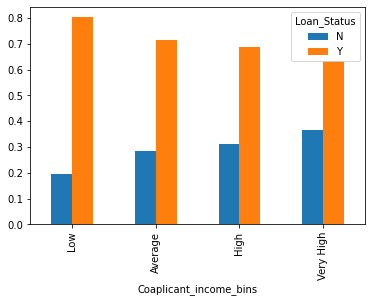

In [42]:
Coapplicant_income_bins = pd.crosstab(df_train['Coaplicant_income_bins'],df_train['Loan_Status'])
Coapplicant_income_bins.div(Coapplicant_income_bins.sum(1).astype('float'), axis=0).plot.bar()

<AxesSubplot:xlabel='total_income_bins'>

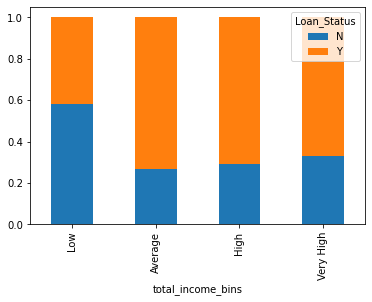

In [43]:
#Combining applicants and coapplicants income
df_train['total_income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
groups = ['Low', 'Average', 'High', 'Very High']
df_train['total_income_bins'] = pd.cut(df_train['total_income'], bins, labels=groups)

total_income_bins = pd.crosstab(df_train['total_income_bins'],df_train['Loan_Status'])
total_income_bins.div(total_income_bins.sum(1).astype('float'), axis=0).plot(kind ='bar',stacked=1)

<AxesSubplot:xlabel='LoanAmount_bins'>

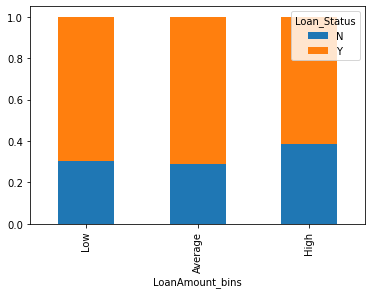

In [44]:
bins = [0,100,200,700]
groups = ['Low', 'Average', 'High']
df_train['LoanAmount_bins'] = pd.cut(df_train['LoanAmount'], bins, labels=groups)

LoanAmount_bins = pd.crosstab(df_train['LoanAmount_bins'],df_train['Loan_Status'])
LoanAmount_bins.div(LoanAmount_bins.sum(1).astype('float'), axis=0).plot(kind ='bar',stacked=1)

In [45]:
df_train=df_train.drop(['LoanAmount_bins','total_income_bins','total_income','income_bins','Coaplicant_income_bins'],axis=1)

In [46]:
df_train['Loan_Status'].replace('N',0,inplace=True)
df_train['Loan_Status'].replace('Y',1,inplace=True)
df_train['Dependents'].replace('3+',3,inplace=True)
df_test['Dependents'].replace('3+',3,inplace=True)

In [47]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


<AxesSubplot:>

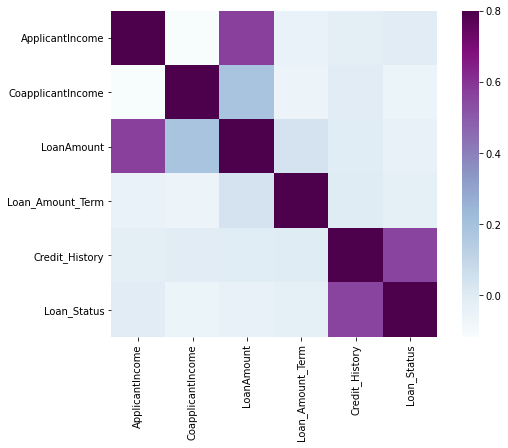

In [48]:
#Corelation
matrix = df_train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True, cmap='BuPu')

Dealing with outliers

In [49]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
#filling categorical attributes

df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [51]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [52]:
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)

In [53]:
#filling numerical attributes
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

In [54]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [55]:
#Filling in test set
df_test['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_test['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_test['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_test['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

In [56]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

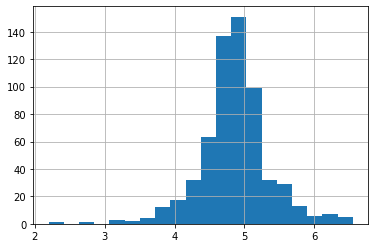

In [57]:
df_train['LoanAmount_log']=np.log(df_train['LoanAmount'])
df_test['LoanAmount_log']=np.log(df_test['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

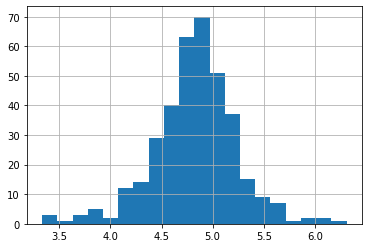

In [58]:
df_test['LoanAmount_log'].hist(bins=20)

In [59]:
df_train = df_train.drop(['Loan_ID'],axis=1)
df_test  = df_test.drop(['Loan_ID'],axis=1)

In [60]:
X = df_train.drop('Loan_Status',axis=1)

In [61]:
Y = df_train.Loan_Status

In [62]:
#Making dummy variables for categorical variables
X = pd.get_dummies(X)
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [63]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [64]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X,Y,test_size=.3)

In [65]:
x_train.shape

(429, 21)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [67]:
#Predicting
pred_val = model.predict(x_val)
accuracy = accuracy_score(y_val,pred_val)
accuracy

0.7783783783783784

In [68]:
pred_val = model.predict(df_test)

In [69]:
df_sample['Loan_ID']=test_org['Loan_ID']
df_sample['Loan_Status'] = pred_val

In [70]:
df_sample['Loan_Status'].replace(0,'N',inplace = True)
df_sample['Loan_Status'].replace(1,'Y',inplace = True)

In [71]:
df_sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [72]:
pd.DataFrame(df_sample,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [73]:
#Stratified K fold split
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle = True)

for train_index, test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    x_tr , x_va = X.loc[train_index],X.loc[test_index]
    y_tr , y_va = Y.loc[train_index],Y.loc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(x_tr,y_tr)
    pred_va = model.predict(x_va)
    accuracy = accuracy_score(y_va,pred_va)
    print(' Accuracy-- ',accuracy)
    i+=1
    pred = model.predict_proba(x_va)[:,1]
    




1 of kfold 5
 Accuracy--  0.8048780487804879

2 of kfold 5
 Accuracy--  0.8373983739837398

3 of kfold 5
 Accuracy--  0.7804878048780488

4 of kfold 5
 Accuracy--  0.7886178861788617

5 of kfold 5
 Accuracy--  0.7950819672131147


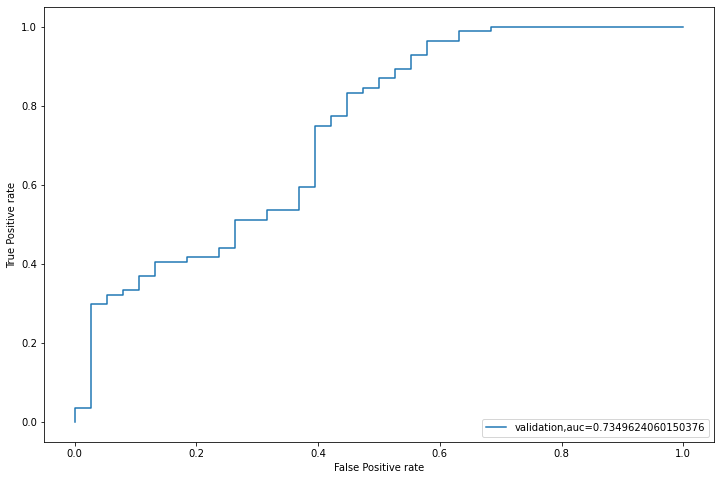

In [74]:
from sklearn import metrics


fpr,tpr,_ = metrics.roc_curve(y_va,pred)
auc = metrics.roc_auc_score(y_va,pred)

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr,label = "validation,auc="+str(auc))

plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')

plt.legend(loc=4)

plt.show()

In [75]:
df_sample['Loan_ID']=test_org['Loan_ID']
df_sample['Loan_Status'] = pred_val

df_sample['Loan_Status'].replace(0,'N',inplace = True)
df_sample['Loan_Status'].replace(1,'Y',inplace = True)

In [76]:
pd.DataFrame(df_sample,columns=['Loan_ID','Loan_Status']).to_csv('logistic2.csv')

In [77]:
df_train['total_income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']
df_train['EMI']=df_train['LoanAmount']/df_train['Loan_Amount_Term']
df_train['Balance_income']=df_train['total_income']-df_train['EMI']*1000

In [78]:
df_test['total_income']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']
df_test['EMI']=df_test['LoanAmount']/df_test['Loan_Amount_Term']
df_test['Balance_income']=df_test['total_income']-df_test['EMI']*1000

In [79]:
df_test['total_income']=np.log(df_test['total_income'])
df_train['total_income']=np.log(df_train['total_income'])

In [80]:
df_train['EMI']=np.log(df_train['EMI'])
df_test['EMI']=np.log(df_test['EMI'])

In [81]:
df_train['Balance_income']=np.log(df_train['Balance_income'])
df_test['Balance_income']=np.log(df_test['Balance_income'])

<AxesSubplot:>

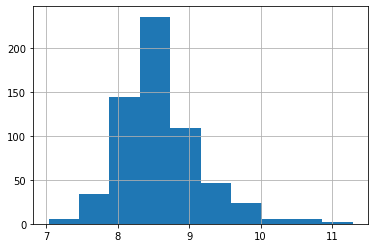

In [82]:
df_train['Balance_income'].hist()

<AxesSubplot:>

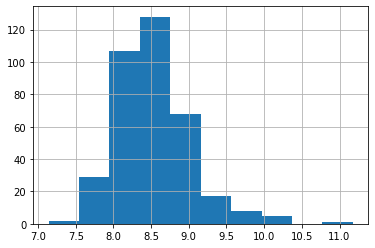

In [83]:
df_test['Balance_income'].hist()

In [84]:
df_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,total_income,EMI,Balance_income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,1,0,1,0,0,0,1,8.674026,-1.034074,8.611311
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,1,0,1,0,1,0,0,8.714568,-1.034074,8.654421
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,8.006368,-1.696449,7.943309
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,0,1,1,0,0,0,1,8.505323,-1.098612,8.435477
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,1,0,0,0,1,8.699515,-0.937344,8.632009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,...,1,0,1,0,1,0,0,7.972466,-1.623424,7.902035
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,...,1,0,1,0,1,0,0,8.320205,-1.504077,8.264564
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,...,1,0,1,0,0,0,1,9.025456,-0.352715,8.937116
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,...,1,0,1,0,0,0,1,8.933664,-0.654995,8.862704


In [85]:
df_train=df_train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
df_test=df_test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)


In [86]:
df_train

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,total_income,EMI,Balance_income
0,1.0,1,4.852030,0,1,1,0,0,1,0,...,1,0,1,0,0,0,1,8.674026,-1.034074,8.611311
1,1.0,0,4.852030,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,8.714568,-1.034074,8.654421
2,1.0,1,4.189655,0,1,0,1,0,1,0,...,1,0,0,1,0,0,1,8.006368,-1.696449,7.943309
3,1.0,1,4.787492,0,1,0,1,0,1,0,...,0,1,1,0,0,0,1,8.505323,-1.098612,8.435477
4,1.0,1,4.948760,0,1,1,0,0,1,0,...,1,0,1,0,0,0,1,8.699515,-0.937344,8.632009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1,4.262680,1,0,1,0,0,1,0,...,1,0,1,0,1,0,0,7.972466,-1.623424,7.902035
610,1.0,1,3.688879,0,1,0,1,1,0,0,...,1,0,1,0,1,0,0,8.320205,-1.504077,8.264564
611,1.0,1,5.533389,0,1,0,1,0,0,1,...,1,0,1,0,0,0,1,9.025456,-0.352715,8.937116
612,1.0,1,5.231109,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,8.933664,-0.654995,8.862704


In [87]:
X = df_train.drop('Loan_Status',1)
Y = df_train.Loan_Status
X['Balance_income']= X['Balance_income'].fillna(X['Balance_income'].median())
np.all(np.isfinite(X))

True

In [88]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle = True)

for train_index, test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    x_trr , x_vaa = X.loc[train_index],X.loc[test_index]
    y_trr , y_vaa = Y.loc[train_index],Y.loc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(x_trr,y_trr)
    pred_vaa = model.predict(x_vaa)
    accuracy = accuracy_score(y_vaa,pred_vaa)
    print(' Accuracy-- ',accuracy)
    pred = model.predict_proba(x_vaa)[:,1]
    
    i+=1
    
    


1 of kfold 5
 Accuracy--  0.8130081300813008

2 of kfold 5
 Accuracy--  0.8373983739837398

3 of kfold 5
 Accuracy--  0.7967479674796748

4 of kfold 5
 Accuracy--  0.8048780487804879

5 of kfold 5
 Accuracy--  0.7950819672131147


In [89]:
#Decision Tree
from sklearn import tree

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,Y):
    print('\n{} of {} Kfold '.format(i,kf.n_splits))
    x_tr3, y_tr3 = X.loc[train_index],Y.loc[train_index]
    x_va3, y_va3 = X.loc[test_index], Y.loc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(x_tr3,y_tr3)
    pred = model.predict(x_va3)
    accuracy = accuracy_score(pred,y_va3)
    print('Accuracy_score-->',accuracy)
    i+=1


1 of 5 Kfold 
Accuracy_score--> 0.7317073170731707

2 of 5 Kfold 
Accuracy_score--> 0.7560975609756098

3 of 5 Kfold 
Accuracy_score--> 0.6747967479674797

4 of 5 Kfold 
Accuracy_score--> 0.7154471544715447

5 of 5 Kfold 
Accuracy_score--> 0.7049180327868853


In [90]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,Y):
    print('\n{} of {} Kfold '.format(i,kf.n_splits))
    x_tr3, y_tr3 = X.loc[train_index],Y.loc[train_index]
    x_va3, y_va3 = X.loc[test_index], Y.loc[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(x_tr3,y_tr3)
    pred = model.predict(x_va3)
    accuracy = accuracy_score(pred,y_va3)
    print('Accuracy_score-->',accuracy)
    i+=1


1 of 5 Kfold 
Accuracy_score--> 0.8211382113821138

2 of 5 Kfold 
Accuracy_score--> 0.8292682926829268

3 of 5 Kfold 
Accuracy_score--> 0.7886178861788617

4 of 5 Kfold 
Accuracy_score--> 0.8130081300813008

5 of 5 Kfold 
Accuracy_score--> 0.7868852459016393


In [91]:
#GridSearch
from sklearn.model_selection import GridSearchCV, train_test_split

paramgrid = {'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

x_trg,x_cvg,y_trg,y_cvg=train_test_split(X,Y,test_size =.3,random_state=1)
grid_search.fit(x_trg,y_trg)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [92]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=61, random_state=1)

In [93]:
#Random Forest after grid search
from sklearn.ensemble import RandomForestClassifier

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,Y):
    print('\n{} of {} Kfold '.format(i,kf.n_splits))
    x_tr3, y_tr3 = X.loc[train_index],Y.loc[train_index]
    x_va3, y_va3 = X.loc[test_index], Y.loc[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=3,n_estimators=61)
    model.fit(x_tr3,y_tr3)
    pred = model.predict(x_va3)
    accuracy = accuracy_score(pred,y_va3)
    print('Accuracy_score-->',accuracy)
    i+=1


1 of 5 Kfold 
Accuracy_score--> 0.8130081300813008

2 of 5 Kfold 
Accuracy_score--> 0.8373983739837398

3 of 5 Kfold 
Accuracy_score--> 0.8048780487804879

4 of 5 Kfold 
Accuracy_score--> 0.8048780487804879

5 of 5 Kfold 
Accuracy_score--> 0.7950819672131147


In [94]:
#Importance of feature

importance = pd.Series(model.feature_importances_,index = X.columns)
importance

Credit_History             0.510620
LoanAmount_log             0.074362
Gender_Female              0.000929
Gender_Male                0.004312
Married_No                 0.020550
Married_Yes                0.025187
Dependents_3               0.002608
Dependents_0               0.003446
Dependents_1               0.003502
Dependents_2               0.004551
Education_Graduate         0.010068
Education_Not Graduate     0.012029
Self_Employed_No           0.006148
Self_Employed_Yes          0.003055
Property_Area_Rural        0.039401
Property_Area_Semiurban    0.029359
Property_Area_Urban        0.015705
total_income               0.083489
EMI                        0.043884
Balance_income             0.106794
dtype: float64

<AxesSubplot:>

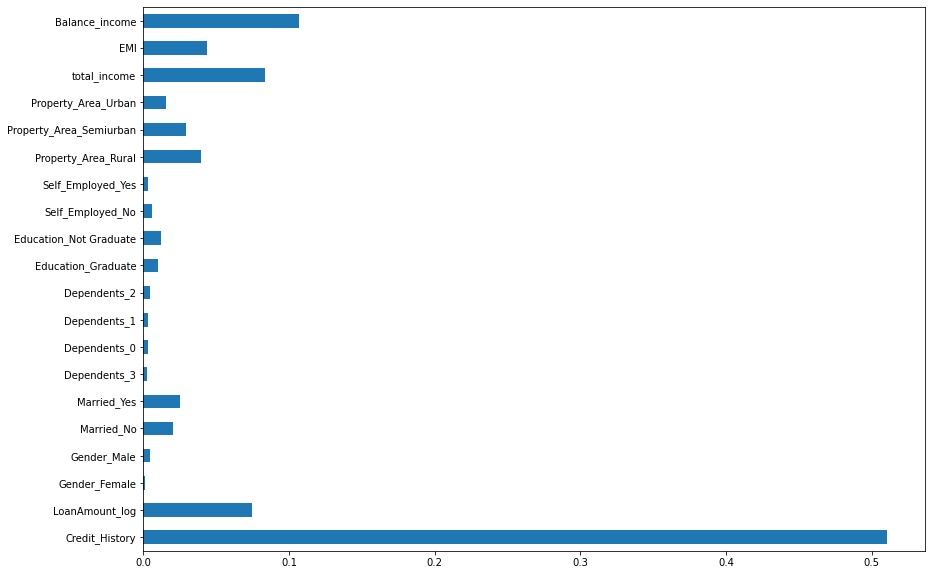

In [95]:
importance.plot(kind='barh',figsize=(14,10))

In [96]:
#Random Forest
from xgboost import XGBClassifier

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=1
for train_index,test_index in kf.split(X,Y):
    print('\n{} of {} Kfold '.format(i,kf.n_splits))
    x_tr3, y_tr3 = X.loc[train_index],Y.loc[train_index]
    x_va3, y_va3 = X.loc[test_index], Y.loc[test_index]
    
    model = XGBClassifier(random_state=58, max_depth=4)
    model.fit(x_tr3,y_tr3)
    pred = model.predict(x_va3)
    accuracy = accuracy_score(pred,y_va3)
    print('Accuracy_score-->',accuracy)
    i+=1


1 of 5 Kfold 
Accuracy_score--> 0.7398373983739838

2 of 5 Kfold 
Accuracy_score--> 0.7479674796747967

3 of 5 Kfold 
Accuracy_score--> 0.7804878048780488

4 of 5 Kfold 
Accuracy_score--> 0.7642276422764228

5 of 5 Kfold 
Accuracy_score--> 0.7540983606557377
